-------------
### ライブラリのインポート

In [1]:
# 基本的なライブラリ
import numpy as np
import pandas as pd
from numpy.typing import NDArray
from scipy import stats

# タイピングのサポート
from typing import Optional

# 可視化の設定
import matplotlib.pyplot as plt
import japanize_matplotlib
import itertools

from matplotlib.ticker import FuncFormatter

plt.style.use("ggplot")

In [2]:
optimal_color = "#6b1314"
proportional_color = "#b87a76"

コピペ

In [3]:
N_time_dict = {
    100000: {
        "Proportional": [
            11.494642734527588,
            7.133418083190918,
            6.988861560821533,
            7.035306930541992,
            7.318165302276611,
            7.310453176498413,
            7.283281326293945,
            8.020931720733643,
            9.223298072814941,
            9.106302976608276,
            9.015653848648071,
            9.133874416351318,
            9.122544765472412,
            9.060208797454834,
            9.41791582107544,
            9.118446111679077,
            8.81524920463562,
            9.032064437866211,
            9.173968076705933,
            8.717610836029053,
            8.96396279335022,
            9.51076054573059,
            8.741259574890137,
            8.876100778579712,
            9.05951452255249,
            9.339770555496216,
            10.304289102554321,
            9.458060026168823,
            8.991179466247559,
            9.476764917373657,
            10.021916389465332,
            9.936054229736328,
            9.168236494064331,
            9.02291750907898,
            9.62820053100586,
            8.889513969421387,
            8.873544931411743,
            8.600855827331543,
            9.50282621383667,
            9.94145154953003,
            8.859837770462036,
            9.894223690032959,
            9.131037473678589,
            8.576645374298096,
            9.445693254470825,
            9.197160482406616,
            9.110815525054932,
            10.164265394210815,
            9.492261409759521,
            10.219842910766602,
        ],
        "Optimal": [
            22.081136465072632,
            22.244641542434692,
            21.837161540985107,
            20.644452571868896,
            21.365894079208374,
            38.972431898117065,
            41.7353675365448,
            19.67239022254944,
            19.9546217918396,
            20.29777431488037,
            29.240757942199707,
            30.51189684867859,
            20.8812198638916,
            22.216763734817505,
            23.015634298324585,
            22.635570526123047,
            22.371689558029175,
            22.17223882675171,
            22.96896505355835,
            22.45945382118225,
            21.986370086669922,
            23.414567708969116,
            22.92503571510315,
            21.074915409088135,
            20.73374080657959,
            20.47471594810486,
            20.568101167678833,
            20.59406542778015,
            20.3726224899292,
            20.413931608200073,
            20.404834270477295,
            20.683348417282104,
            20.790000677108765,
            21.358107566833496,
            21.273802757263184,
            39.04098892211914,
            46.58485174179077,
            19.314387321472168,
            20.24776577949524,
            21.245308876037598,
            23.858633279800415,
            28.578895330429077,
            21.90066885948181,
            22.230441331863403,
            22.779896020889282,
            21.806086540222168,
            25.168572664260864,
            28.102845668792725,
            20.485786199569702,
            21.806204557418823,
        ],
    },
    200000: {
        "Proportional": [
            16.19822669029236,
            13.692548751831055,
            14.335336446762085,
            14.910475254058838,
            15.324789762496948,
            19.073649883270264,
            20.38047432899475,
            18.03941059112549,
            18.725034952163696,
            17.602160215377808,
            17.096802711486816,
            17.353885650634766,
            17.359519958496094,
            17.751917123794556,
            17.135374307632446,
            16.693151473999023,
            16.353816986083984,
            16.608585357666016,
            16.134289026260376,
            16.581689834594727,
            16.92834186553955,
            17.257415771484375,
            17.793704748153687,
            17.05531406402588,
            17.827346086502075,
            18.75560164451599,
            17.32488775253296,
            18.696239948272705,
            26.94879174232483,
            25.96006464958191,
            28.49856472015381,
            26.059662580490112,
            23.94000482559204,
            24.769043922424316,
            24.36017680168152,
            18.12291383743286,
            16.8189959526062,
            17.250553369522095,
            17.215675115585327,
            17.766384601593018,
            17.73417568206787,
            17.623361349105835,
            17.819544553756714,
            18.287923574447632,
            17.70190739631653,
            17.70382833480835,
            18.45759391784668,
            17.912916660308838,
            18.546344995498657,
            18.785017728805542,
        ],
        "Optimal": [
            29.867681980133057,
            30.166395664215088,
            28.393218994140625,
            30.128013134002686,
            26.453388690948486,
            31.826684951782227,
            27.71355104446411,
            44.678170919418335,
            51.57962656021118,
            30.89549469947815,
            25.584437131881714,
            36.068005084991455,
            40.3950457572937,
            30.39373517036438,
            27.77976965904236,
            30.032878875732422,
            30.225491523742676,
            28.755263090133667,
            28.970360279083252,
            27.993057012557983,
            27.750423669815063,
            27.858883142471313,
            27.50477647781372,
            27.44223427772522,
            27.80927038192749,
            27.74244499206543,
            27.76790165901184,
            28.739636182785034,
            30.697084426879883,
            32.12768912315369,
            32.483832359313965,
            28.636836767196655,
            27.926626205444336,
            27.70982527732849,
            29.08749222755432,
            27.064311981201172,
            33.15249252319336,
            27.75343680381775,
            27.808372259140015,
            27.89787721633911,
            27.668272018432617,
            27.749958753585815,
            28.155224323272705,
            28.07205891609192,
            28.064639568328857,
            28.142900228500366,
            27.830913543701172,
            27.84063410758972,
            28.713261127471924,
            27.06109929084778,
        ],
    },
    300000: {
        "Proportional": [
            19.567768573760986,
            18.58666205406189,
            19.011326551437378,
            19.16789484024048,
            23.25377106666565,
            23.311545848846436,
            23.106527090072632,
            22.98419737815857,
            22.571305990219116,
            22.630383253097534,
            22.400928020477295,
            22.349897861480713,
            22.86977982521057,
            22.67919135093689,
            22.687573671340942,
            22.851070642471313,
            22.57819414138794,
            22.756502866744995,
            22.72898554801941,
            22.662712335586548,
            22.8771915435791,
            22.7970073223114,
            22.84915280342102,
            22.920735359191895,
            22.545536279678345,
            22.90070915222168,
            22.659257173538208,
            21.31451416015625,
            21.458009004592896,
            21.400416612625122,
            21.460826635360718,
            21.540629863739014,
            21.311541080474854,
            21.58595585823059,
            21.383132219314575,
            21.222713470458984,
            21.678126096725464,
            21.39602565765381,
            21.412660598754883,
            21.38511872291565,
            21.347370386123657,
            21.31513500213623,
            21.38680624961853,
            21.315622806549072,
            21.28733491897583,
            21.40755605697632,
            21.535080671310425,
            21.497381687164307,
            21.50303339958191,
            21.333720445632935,
        ],
        "Optimal": [
            32.482627630233765,
            33.81999492645264,
            33.8567168712616,
            32.543797969818115,
            32.156091928482056,
            33.704105377197266,
            32.869471073150635,
            34.48026394844055,
            32.96133279800415,
            34.203182220458984,
            33.44273018836975,
            37.35221815109253,
            35.7230486869812,
            33.57922124862671,
            38.945852279663086,
            45.2235951423645,
            33.30438470840454,
            33.171279430389404,
            32.98741936683655,
            33.11581540107727,
            33.06446838378906,
            33.02838730812073,
            32.885112285614014,
            33.36576962471008,
            33.14367961883545,
            35.259509801864624,
            34.129172563552856,
            34.403804779052734,
            33.85259008407593,
            31.928934812545776,
            33.67300772666931,
            32.674290895462036,
            34.027249574661255,
            34.483386516571045,
            33.6192409992218,
            32.89209842681885,
            32.80733346939087,
            32.277766942977905,
            33.337666034698486,
            32.9194073677063,
            32.99834370613098,
            33.3071506023407,
            33.11561131477356,
            33.00870871543884,
            33.87454700469971,
            34.27028155326843,
            32.900813817977905,
            33.20461416244507,
            33.44771885871887,
            33.53483295440674,
        ],
    },
    400000: {
        "Proportional": [
            26.326813220977783,
            25.82990550994873,
            27.322747945785522,
            30.917627334594727,
            31.160651922225952,
            30.486899614334106,
            30.333504676818848,
            29.758312940597534,
            30.230035066604614,
            30.100644826889038,
            30.271087646484375,
            29.584261178970337,
            29.326131343841553,
            29.20366883277893,
            29.794498443603516,
            28.95976448059082,
            28.87635564804077,
            29.159798622131348,
            29.81202244758606,
            29.43091654777527,
            29.348094701766968,
            29.58409357070923,
            29.45894694328308,
            29.13117551803589,
            28.95160484313965,
            29.113959074020386,
            29.51103711128235,
            29.042118549346924,
            29.365716218948364,
            28.994988441467285,
            28.698402404785156,
            29.085825443267822,
            29.569278240203857,
            29.283942222595215,
            28.67750597000122,
            29.43266463279724,
            28.767691612243652,
            29.020540714263916,
            29.05412006378174,
            29.92041015625,
            29.380114555358887,
            28.92633366584778,
            29.103715658187866,
            29.84717631340027,
            29.265251398086548,
            29.644720315933228,
            29.231220483779907,
            29.441204071044922,
            28.93526816368103,
            29.69876456260681,
        ],
        "Optimal": [
            39.47801089286804,
            39.627870321273804,
            38.34037256240845,
            40.49857568740845,
            39.10681891441345,
            40.38992953300476,
            40.55927085876465,
            39.91993284225464,
            40.68946623802185,
            40.37211585044861,
            41.929728269577026,
            40.12562608718872,
            40.57841920852661,
            40.69610857963562,
            38.76171040534973,
            38.37145256996155,
            42.179927110672,
            41.82102394104004,
            41.89678931236267,
            42.53303837776184,
            40.07029414176941,
            39.06615114212036,
            40.05130410194397,
            41.34429216384888,
            40.11883354187012,
            40.19247126579285,
            39.15473675727844,
            41.19127058982849,
            41.0870099067688,
            40.45995736122131,
            40.31546401977539,
            42.69729924201965,
            40.89000415802002,
            42.36063885688782,
            41.57253813743591,
            42.77934789657593,
            41.242865800857544,
            41.98282027244568,
            40.702205181121826,
            41.5041139125824,
            42.196890354156494,
            39.38679075241089,
            39.74281406402588,
            42.252344608306885,
            41.67590045928955,
            38.96646165847778,
            40.45543050765991,
            40.994739055633545,
            41.81502103805542,
            41.04629039764404,
        ],
    },
}

p_time_dict = {
    20: {
        "Proportional": [
            8.514220476150513,
            7.105288743972778,
            9.459508180618286,
            8.203676462173462,
            8.775670051574707,
            7.6717870235443115,
            7.442620515823364,
            7.113354444503784,
            7.618753671646118,
            7.532654523849487,
            7.4317004680633545,
            7.582708835601807,
            7.754258632659912,
            7.59375,
            7.657378911972046,
            8.537402868270874,
            9.1110200881958,
            9.058528900146484,
            8.867066144943237,
            8.974081754684448,
            9.07279086112976,
            8.558447360992432,
            9.02823257446289,
            8.835417985916138,
            9.110298156738281,
            9.058049440383911,
            8.675429105758667,
            8.732927322387695,
            8.723182678222656,
            8.684736967086792,
            8.599298238754272,
            8.356446266174316,
            9.046586275100708,
            9.243560552597046,
            8.40741515159607,
            8.452406406402588,
            8.468894481658936,
            8.514912366867065,
            8.60658311843872,
            8.277281999588013,
            8.382646560668945,
            8.07725715637207,
            8.283074140548706,
            8.099411010742188,
            8.237662553787231,
            8.112186193466187,
            8.19928789138794,
            8.127232789993286,
            8.196186065673828,
            8.11567735671997,
        ],
        "Optimal": [
            20.04757809638977,
            19.728856325149536,
            20.058337450027466,
            20.0561044216156,
            20.34996724128723,
            20.74585795402527,
            20.44944143295288,
            20.558457374572754,
            23.16973066329956,
            22.16060161590576,
            21.597442150115967,
            22.017171144485474,
            20.82029414176941,
            21.711244821548462,
            20.261253595352173,
            21.798028230667114,
            20.46845030784607,
            21.509984731674194,
            19.509827852249146,
            20.789126873016357,
            22.16611671447754,
            20.65286946296692,
            21.457088470458984,
            20.724491596221924,
            21.507514238357544,
            20.48208999633789,
            20.730833768844604,
            21.961234092712402,
            20.20227074623108,
            20.963470935821533,
            22.728440284729004,
            22.618018627166748,
            19.935845375061035,
            21.242743253707886,
            19.984010696411133,
            21.501999139785767,
            21.359060764312744,
            21.928916931152344,
            20.013263463974,
            22.63397717475891,
            20.612943649291992,
            20.588160753250122,
            21.94047713279724,
            22.05061101913452,
            21.593348741531372,
            22.15204906463623,
            23.126722812652588,
            22.603138208389282,
            21.381837844848633,
            21.20668363571167,
        ],
    },
    40: {
        "Proportional": [
            16.36144256591797,
            15.437258005142212,
            15.53929877281189,
            15.817721605300903,
            15.994007587432861,
            19.608558177947998,
            20.0103497505188,
            19.89819645881653,
            20.04244613647461,
            19.264453649520874,
            19.48797917366028,
            19.102275609970093,
            19.16516613960266,
            18.634511709213257,
            18.68625783920288,
            18.35080361366272,
            18.149118900299072,
            16.945700645446777,
            17.311168670654297,
            17.21517515182495,
            17.302706718444824,
            17.50217580795288,
            17.340365886688232,
            17.421448945999146,
            17.433497667312622,
            17.519298553466797,
            17.346631288528442,
            17.232925415039062,
            17.50120258331299,
            17.125269651412964,
            17.29067611694336,
            17.563111543655396,
            17.570552349090576,
            17.517447233200073,
            17.533100605010986,
            17.88997983932495,
            17.390156507492065,
            17.34946584701538,
            17.684075593948364,
            20.707075119018555,
            21.8266544342041,
            27.826861143112183,
            20.519936323165894,
            20.30575394630432,
            19.914859294891357,
            20.81875991821289,
            19.804534196853638,
            20.919527530670166,
            20.891701459884644,
            20.401508569717407,
        ],
        "Optimal": [
            48.846455097198486,
            46.32221174240112,
            45.64060354232788,
            46.13628268241882,
            66.81886100769043,
            68.52998065948486,
            44.433316230773926,
            47.84642481803894,
            49.384185552597046,
            47.13774299621582,
            47.348780393600464,
            46.045103549957275,
            43.64895987510681,
            43.70115637779236,
            54.75805425643921,
            45.770551681518555,
            44.19902586936951,
            43.98098540306091,
            43.65089130401611,
            44.96888828277588,
            44.19525361061096,
            52.81331968307495,
            44.99214220046997,
            45.16532254219055,
            44.38897514343262,
            44.44341683387756,
            44.459965229034424,
            44.91467237472534,
            46.336637020111084,
            47.59949469566345,
            48.6455020904541,
            45.57936239242554,
            45.72538232803345,
            47.14611792564392,
            45.80018496513367,
            45.820690393447876,
            46.12297606468201,
            46.87880086898804,
            46.81518268585205,
            46.265594720840454,
            45.55501627922058,
            46.669599771499634,
            44.630407094955444,
            45.95216751098633,
            44.47895407676697,
            45.855149030685425,
            47.1741361618042,
            45.70653939247131,
            44.74424147605896,
            45.380144119262695,
        ],
    },
    60: {
        "Proportional": [
            24.16511058807373,
            23.853633642196655,
            27.800549030303955,
            29.80667519569397,
            29.782747983932495,
            29.37062931060791,
            29.005659103393555,
            28.37633776664734,
            28.68874216079712,
            27.89686632156372,
            28.035455465316772,
            26.0346736907959,
            25.838796377182007,
            26.606349229812622,
            26.057220697402954,
            26.137214422225952,
            25.524723052978516,
            25.703475952148438,
            25.499254941940308,
            25.604764699935913,
            25.872886896133423,
            25.866538286209106,
            26.00492787361145,
            25.58321714401245,
            26.123671770095825,
            25.7343909740448,
            25.750901699066162,
            26.032672882080078,
            25.937487363815308,
            25.811885833740234,
            25.81021237373352,
            25.646984815597534,
            25.510565280914307,
            25.639182329177856,
            25.754761219024658,
            25.763031005859375,
            26.312012672424316,
            26.198171377182007,
            26.040823459625244,
            26.000015020370483,
            25.894180297851562,
            26.122488021850586,
            25.614840030670166,
            26.09041666984558,
            25.974851608276367,
            26.283324480056763,
            26.01223373413086,
            25.873534679412842,
            25.781019687652588,
            25.4753155708313,
        ],
        "Optimal": [
            70.22743940353394,
            66.14906215667725,
            64.7683174610138,
            65.44329905509949,
            65.03729581832886,
            66.42749238014221,
            64.76779294013977,
            65.75319194793701,
            66.03513264656067,
            67.03287243843079,
            66.91084933280945,
            68.08426237106323,
            66.25701808929443,
            67.00699210166931,
            68.57945466041565,
            67.42031598091125,
            68.78586840629578,
            66.94747614860535,
            66.33585906028748,
            69.19068384170532,
            64.54385089874268,
            64.79744052886963,
            64.18350052833557,
            64.11329412460327,
            65.07493758201599,
            66.06340479850769,
            66.3294129371643,
            69.20280599594116,
            68.19456624984741,
            67.80989241600037,
            65.83496427536011,
            64.73183178901672,
            66.01738715171814,
            73.4879150390625,
            67.61164808273315,
            65.29075884819031,
            65.60752820968628,
            69.07941555976868,
            65.10824036598206,
            64.76257038116455,
            67.01599383354187,
            63.60459089279175,
            67.91892552375793,
            68.98672103881836,
            67.83689069747925,
            64.76334118843079,
            66.2962818145752,
            67.31754684448242,
            63.29977011680603,
            63.618860721588135,
        ],
    },
    80: {
        "Proportional": [
            56.9152455329895,
            58.909085750579834,
            58.15414214134216,
            58.087013721466064,
            57.92819333076477,
            59.61953377723694,
            60.79648518562317,
            59.8999981880188,
            58.83875632286072,
            58.52111577987671,
            58.18981862068176,
            59.18365216255188,
            61.02098798751831,
            60.013916015625,
            59.92047595977783,
            60.642560958862305,
            59.8067569732666,
            60.98387145996094,
            59.70317482948303,
            60.67450451850891,
            59.863513708114624,
            60.53459453582764,
            59.58225655555725,
            60.03040170669556,
            60.71448349952698,
            60.18168234825134,
            59.34932351112366,
            58.522701263427734,
            59.374324560165405,
            58.11540246009827,
            58.92206645011902,
            58.35657000541687,
            58.68981409072876,
            59.028557538986206,
            59.58184027671814,
            59.324867486953735,
            58.52444005012512,
            60.147971391677856,
            59.955528259277344,
            59.164175033569336,
            59.84628367424011,
            58.19874978065491,
            60.48573350906372,
            59.04533886909485,
            59.193652629852295,
            59.623876333236694,
            59.171881437301636,
            58.39547634124756,
            59.78320026397705,
            59.11124038696289,
        ],
        "Optimal": [
            205.91055536270142,
            205.86536717414856,
            206.9608097076416,
            205.5313594341278,
            206.18870902061462,
            177.40241265296936,
            95.3803141117096,
            86.43634057044983,
            89.97938418388367,
            89.25537347793579,
            91.16580653190613,
            92.94889569282532,
            89.95402550697327,
            90.02572298049927,
            92.34753394126892,
            89.95370864868164,
            88.56660151481628,
            87.80777263641357,
            88.06236934661865,
            93.46159172058105,
            93.44578552246094,
            91.43261194229126,
            91.2033326625824,
            90.8525002002716,
            91.40749621391296,
            89.53509378433228,
            91.57644271850586,
            87.2791919708252,
            86.90724873542786,
            89.5610032081604,
            94.30932474136353,
            93.11155033111572,
            88.17260360717773,
            90.77545428276062,
            89.61758732795715,
            89.998544216156,
            90.38999009132385,
            93.46921277046204,
            93.15136861801147,
            92.71600484848022,
            91.42019629478455,
            91.5293083190918,
            90.9746789932251,
            89.90900707244873,
            91.62964057922363,
            95.2554190158844,
            90.4913067817688,
            93.70314621925354,
            88.39794182777405,
            92.07951760292053,
        ],
    },
}

In [4]:
def make_dict(time_dict: dict[str, dict[str, list]], allocation_method: str) -> dict:
    average_dict = {}
    average_dict[0] = 0
    for key, dict in time_dict.items():
        average_dict[key] = sum(dict[allocation_method]) / len(dict[allocation_method])

    return average_dict

In [5]:
N_pro_dict = make_dict(N_time_dict, "Proportional")
N_opt_dict = make_dict(N_time_dict, "Optimal")

p_pro_dict = make_dict(p_time_dict, "Proportional")
p_opt_dict = make_dict(p_time_dict, "Optimal")

In [6]:
print(N_pro_dict)

{0: 0, 100000: 9.038423228263856, 200000: 18.54546875, 300000: 21.85569040298462, 400000: 29.28743067741394}


-----------
### 可視化

データサイズを変えたとき

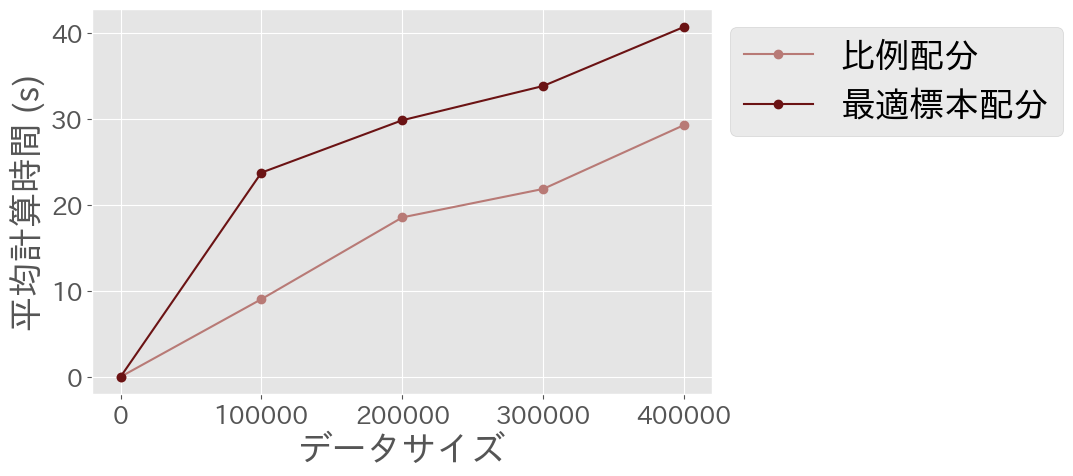

In [7]:
x = N_pro_dict.keys()
y_pro = N_pro_dict.values()
y_opt = N_opt_dict.values()

plt.figure(figsize=(8, 5))
plt.plot(x, y_pro, marker="o", label="比例配分", color=proportional_color)
plt.plot(x, y_opt, marker="o", label="最適標本配分", color=optimal_color)
plt.xlabel("データサイズ", fontsize=25)  # 25 #40
plt.xticks([0, 100000, 200000, 300000, 400000])
plt.tick_params(axis="both", labelsize=18)  # 18 #22
plt.ylabel("平均計算時間 (s)", fontsize=25)  # 25 #40
plt.legend(fontsize=25, loc="upper left", bbox_to_anchor=(1, 1))  # 25
plt.show()

特徴量数を変えた場合

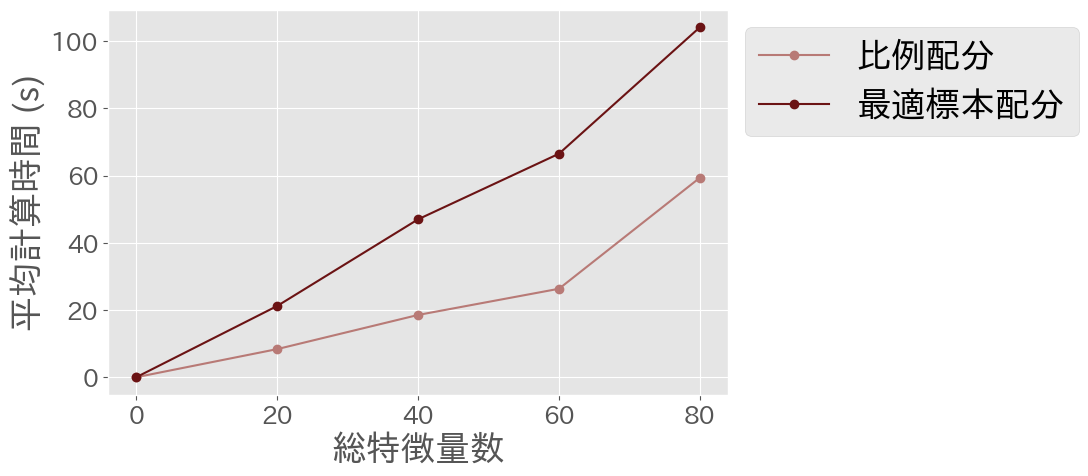

In [8]:
x = p_pro_dict.keys()
y_pro = p_pro_dict.values()
y_opt = p_opt_dict.values()

plt.figure(figsize=(8, 5))
plt.plot(x, y_pro, marker="o", label="比例配分", color=proportional_color)
plt.plot(x, y_opt, marker="o", label="最適標本配分", color=optimal_color)
plt.xlabel("総特徴量数", fontsize=25)  # 25 #40
plt.xticks([0, 20, 40, 60, 80])
plt.tick_params(axis="both", labelsize=18)  # 18 #22
plt.ylabel("平均計算時間 (s)", fontsize=25)  # 25 #40
plt.legend(fontsize=25, loc="upper left", bbox_to_anchor=(1, 1))  # 25
plt.show()